
<hr>

**Exercício 1** Construa um modelo de classificação para o risco de ataque cardíaco. Requisitos:

- utilize Pipeline
- compare os desempenhos de classificação. Teste diferentes números de componentes manualmente.

<hr>

### 1 - Importações

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ignorar warnings
warnings.filterwarnings('ignore')

### 2 - Tratamento Inicial dos Dados

In [2]:
# carregar os dados
data_h = pd.read_csv('../data/heart.csv')
data_h.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# separando preditores e preditos
x_h = data_h.drop(['output'], axis=1)
y_h = data_h[['output']]

# separar em treino e teste
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_h, y_h, test_size=0.2, random_state=2)



### 3 - Seleção do Número de Componentes

In [4]:
# criar um pipeline para selecionar o número de componentes (método do cotovelo)
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=2))
])

# ajuste o pipeline
pca_pipe.fit((x_train_h))


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(random_state=2))])

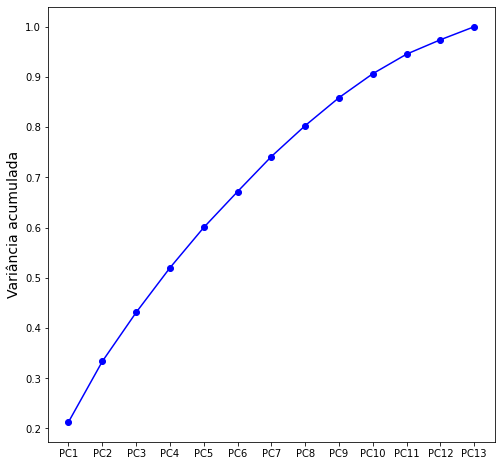

In [5]:
# gráfico de variâncias acumuladas
plt.figure(figsize=(8, 8))
plt.plot(range(x_train_h.shape[1]), pca_pipe['pca'].explained_variance_ratio_.cumsum(), 'bo-')
plt.xticks(range(x_train_h.shape[1]), labels=[f'PC{i+1}' for i in range(x_train_h.shape[1])])
plt.ylabel('Variância acumulada', size=14)
plt.show()


Como não há uma inflexão clara ("cotovelo"), optou-se por utilizar o  n_components = 6 (mais ou menos o valor central) para prosseguir

### 4 - Comparação do Número de Componentes

In [6]:
# função auxiliar para executar o modelo e apresentar os resultados
def run_analys(n_components):
    
    # criar o pipeline de modelagem
    pipe_model_pca = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components, random_state=2)),
        ('model', LogisticRegression(solver='saga', random_state=2) )
    ])


    pipe_model_pca.fit(x_train_h, y_train_h)

    yhat = pipe_model_pca.predict(x_test_h)

    print(classification_report(y_test_h, yhat))


In [7]:
# executando com 6 componentes
n_components = 6
run_analys (n_components)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [8]:
# executando com 5 componentes
n_components = 5
run_analys (n_components)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [9]:
# executando com 7 componentes
n_components = 7
run_analys (n_components)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Observamos que ao executar o modelo com n_components igual a 5, 6 ou 7, o resultado é o mesmo. Não há variação significativa.

A precisão do diagnóstico positivo foi relativamente baixa (87%), mas o recall foi comparativamente alto (93%).
Um recall alto, neste caso, não é ruim pois, do ponto de vista do diagnóstico de ataque cardíaco é melhor ter um falso positivo do que um falso negativo, pois é preferível indicar que a pessoa pode ter um ataque cardíaco e errar, do que indicar que não vai ter um ataque cardíaco e o paciente vir a falecer.